In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [453]:
df = pd.read_csv('Travel.CSV')

In [454]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [455]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [456]:
## non zero returns are the ones having nulls
## age 226 null values

In [457]:
## Lot of catehorical features also 

### data cleaning

In [458]:
df['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [459]:
df["MaritalStatus"].unique()

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

In [460]:
df['TypeofContact'].unique()
df.loc[df['TypeofContact'].isna()].shape[0]

25

In [461]:
df['Gender'] = df['Gender'].replace("Fe Male","Female")
df["MaritalStatus"] = df["MaritalStatus"].replace("Single","Unmarried")

In [462]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [463]:
df["MaritalStatus"].unique()

array(['Unmarried', 'Divorced', 'Married'], dtype=object)

In [464]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [465]:
## features with nan values
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
## atleast 1 nan values
## percntage of total values 
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100 ,5))

Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [466]:
df[df['Age'].isnull()].shape[0]
## df['Age'].isnull()

226

In [467]:
df[features_with_na].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4662 non-null   float64
 1   TypeofContact             4863 non-null   object 
 2   DurationOfPitch           4637 non-null   float64
 3   NumberOfFollowups         4843 non-null   float64
 4   PreferredPropertyStar     4862 non-null   float64
 5   NumberOfTrips             4748 non-null   float64
 6   NumberOfChildrenVisiting  4822 non-null   float64
 7   MonthlyIncome             4655 non-null   float64
dtypes: float64(7), object(1)
memory usage: 305.6+ KB


In [468]:
df[features_with_na].select_dtypes(exclude = 'object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [469]:
## 50 percentile and mean are quite close

In [470]:
## median and mean that is 50 percentile and mean are quite close so very less outliers effect

In [471]:
## impute median value for age column 
## categorical feature use mode

In [472]:
df['TypeofContact'].mode()

0    Self Enquiry
Name: TypeofContact, dtype: object

In [473]:
df[features_with_na].head()

df['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [474]:
df.Age.fillna(df.Age.median(), inplace = True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace = True)
df["DurationOfPitch"].fillna(df.DurationOfPitch.median(), inplace = True)
df["NumberOfFollowups"].fillna(df.NumberOfFollowups.mode()[0], inplace = True)
df["PreferredPropertyStar"].fillna(df.PreferredPropertyStar.mode()[0], inplace = True)
df["NumberOfTrips"].fillna(df.NumberOfTrips.median(), inplace = True)
df["NumberOfChildrenVisiting"].fillna(df.NumberOfChildrenVisiting.mode()[0], inplace = True)
df["MonthlyIncome"].fillna(df.MonthlyIncome.median(), inplace = True)

In [475]:
df.drop('CustomerID',axis =1 , inplace = True)

In [476]:
num_features = [features for features in df.columns if df[features].dtype != 'O']
print("number of num features :", len(num_features))

number of num features : 13


In [477]:
cat_features = [features for features in df.columns if df[features].dtype == 'O']
print("number of cat features :",len(cat_features))

number of cat features : 6


In [478]:
## we assumme that descrete feaatures have unique count <= 25

In [479]:
discete_features= [features for features in num_features if df[features].nunique() <= 25]
print("descrete features : ", len(discete_features))

descrete features :  10


In [480]:
continuous_features =  [features for features in num_features if features not  in discete_features]
print("continous features : ", len(continuous_features))

continous features :  3


In [482]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [448]:
df['Age'].nunique()

44

In [451]:
len(df['Age'].unique())

44

### train test split

In [483]:
from sklearn.model_selection import train_test_split
X= df.drop('ProdTaken', axis =1)
y = df['ProdTaken']

In [484]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [486]:
y.value_counts()
## imbalanced datasets but these algos can perform well in even imbalanced dataset

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [489]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test  = train_test_split(X,y , test_size =0.2, random_state = 42)

In [490]:
X_train.shape, X_test.shape

((3910, 18), (978, 18))

In [493]:
cat_features = X.select_dtypes(include  = 'O').columns
num_features = X.select_dtypes(exclude = 'O').columns

In [497]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer

In [500]:
numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop = 'first')

preprocessor = ColumnTransformer(
    [
 ("ohe", ohe_transformer, cat_features),
("numeric", numeric_transformer, num_features)
    ]
)

In [501]:
preprocessor

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('numeric', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object'))])

In [502]:
## applying transformation on training dataset

In [503]:
X_train = preprocessor.fit_transform(X_train)

In [507]:
# pd.DataFrame(X_train)

In [508]:
X_test = preprocessor.transform(X_test)

### maching learning rf 

In [516]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [512]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [518]:
models = {
    'Random forest' : RandomForestClassifier(),
    'Decision tree' : DecisionTreeClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    ## predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

    ## train set perf
    model_train_accuracy = accuracy_score(y_train , y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train_pred, y_train)
    model_train_recall = recall_score(y_train_pred, y_train)
    model_train_roc_auc_score =  roc_auc_score(y_train_pred, y_train)


    ## test set perf
    model_test_accuracy = accuracy_score(y_test , y_test_pred)
    model_test_f1 =f1_score(y_test, y_test_pred)
    model_train_precision = precision_score(y_test_pred, y_test)
    model_test_recall = recall_score(y_test_pred, y_test)
    model_test_roc_auc_score =roc_auc_score(y_test_pred, y_test)

    ## model identifier = 
    print(list(models.keys())[i])
    

    print("Model performance for training set ::")
    print("- accuracy: {:.4f}".format(model_train_accuracy))
    print("- f1 score: {:4f}".format(model_train_f1))
    print("- recall {:.4f}".format(model_train_recall))
    print("- roc_auc_Score {:.4f}".format(model_train_roc_auc_score))

    print("---------------------------------------------------------")

    print("- accuracy {:.4f}".format(model_test_accuracy))
    print("- f1 score {:.4f}".format(model_test_f1))
    print("- recall {:.4f}".format(model_test_recall))
    print("- roc-auc-score {:.4f}".format(model_test_roc_auc_score))

Random forest
Model performance for training set ::
- accuracy: 1.0000
- f1 score: 1.000000
- recall 1.0000
- roc_auc_Score 1.0000
---------------------------------------------------------
- accuracy 0.9213
- f1 score 0.7556
- recall 0.9597
- roc-auc-score 0.9377
Decision tree
Model performance for training set ::
- accuracy: 1.0000
- f1 score: 1.000000
- recall 1.0000
- roc_auc_Score 1.0000
---------------------------------------------------------
- accuracy 0.9162
- f1 score 0.7796
- recall 0.8011
- roc-auc-score 0.8717


### hyperparameter tuning 

In [521]:
rf_params = {
"max_depth":[5,8,9,10,None],
"max_features": [5,7,"auto",8],
"min_samples_split" : [2,8,15,20],
"n_estimators" : [100,200,500,1000],
}

In [522]:
rf_params

{'max_depth': [5, 8, 9, 10, None],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

### efficient way to use random/grid search

In [526]:
randomcv_models = [
    ("Rf", RandomForestClassifier(), rf_params)
]

In [530]:
from sklearn.model_selection import RandomizedSearchCV

In [531]:
model_params = {}

In [535]:
for name, model, param in randomcv_models:
    random = RandomizedSearchCV(estimator = model, n_iter = 100, cv = 3, verbose = 2, n_jobs = -1,param_distributions = param)
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [543]:
for model_name in model_params:
    print("best accuracy for "+model_name+ "is ")
    print(model_params[model_name])

best accuracy for Rfis 
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [550]:
# y_pred_test = random.predict(X_test)
## like this we get the best model with best params but if we are passing multiple models then we should use to get the best params and later
# retrain the model based on these

In [557]:
##training model again by using best param
models = {
"rf_model" :  RandomForestClassifier(n_estimators = 500,min_samples_split = 2 , max_features =8, max_depth =None ) 
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    ## predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

    ## train set perf
    model_train_accuracy = accuracy_score(y_train , y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train_pred, y_train)
    model_train_recall = recall_score(y_train_pred, y_train)
    model_train_roc_auc_score =  roc_auc_score(y_train_pred, y_train)


    ## test set perf
    model_test_accuracy = accuracy_score(y_test , y_test_pred)
    model_test_f1 =f1_score(y_test, y_test_pred)
    model_train_precision = precision_score(y_test_pred, y_test)
    model_test_recall = recall_score(y_test_pred, y_test)
    model_test_roc_auc_score =roc_auc_score(y_test_pred, y_test)

    ## model identifier = 
    print(list(models.keys())[i])
    

    print("Model performance for training set ::")
    print("- accuracy: {:.4f}".format(model_train_accuracy))
    print("- f1 score: {:4f}".format(model_train_f1))
    print("- recall {:.4f}".format(model_train_recall))
    print("- roc_auc_Score {:.4f}".format(model_train_roc_auc_score))

    print("---------------------------------------------------------")

    print("- accuracy {:.4f}".format(model_test_accuracy))
    print("- f1 score {:.4f}".format(model_test_f1))
    print("- recall {:.4f}".format(model_test_recall))
    print("- roc-auc-score {:.4f}".format(model_test_roc_auc_score))

rf_model
Model performance for training set ::
- accuracy: 1.0000
- f1 score: 1.000000
- recall 1.0000
- roc_auc_Score 1.0000
---------------------------------------------------------
- accuracy 0.9284
- f1 score 0.7840
- recall 0.9549
- roc-auc-score 0.9396


In [558]:
from sklearn.metrics import roc_auc_score, roc_curve

In [560]:
plt.figure()
auc_models  = [
{
"label" :'Random forest classifier',
"model" : RandomForestClassifier(n_estimators = 500,min_samples_split = 2 , max_features =8, max_depth =None ) ,
"auc" : 0.9396
}
]

<Figure size 640x480 with 0 Axes>

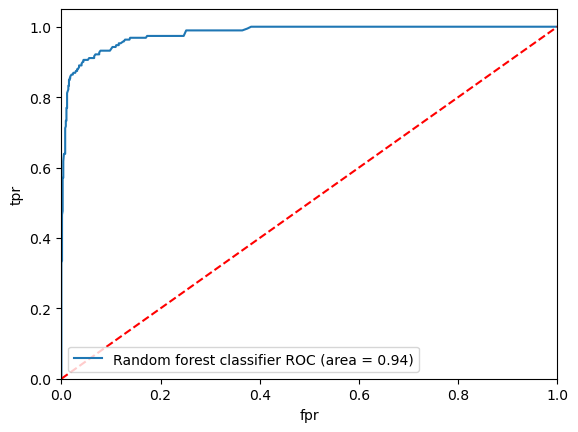

In [575]:
for algo in auc_models:
    model = algo["model"]
    model.fit(X_train,y_train)
    ### fpr , tpr, 
    fpr,tpr, threshold = roc_curve(y_test , model.predict_proba(X_test)[:,1])
    ## area under curve
    plt.plot(fpr, tpr, label = "%s ROC (area = %0.2f)" % (algo['label'], algo['auc']))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc = 'lower left' )
plt.savefig("test.png")
plt.show()

In [576]:
y_test.shape

(978,)

In [577]:
model.predict_proba(X_test)[1]

array([0.952, 0.048])